# Movies Data Analysis using Python

In [ ]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [7]:
#Import the dataset
df = pd.read_csv(r"C:\Users\Germin\Downloads\movies.csv")

In [50]:
#Exploring dataset to view the columns and rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_from_release,is_same_year,Corrected_year,same_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,True,2009,True
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,True,2019,True
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,True,1997,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,True,2015,True
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,True,2018,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [13]:
#Find any missing values in the dataset
df.isnull().sum()


#Use a for loop method to identity any missing values
#for col in df.columns:
    #print(df[col].isnull().value_counts(), "\n")

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [18]:
#We are dropping all rows with missing data
df = df.dropna()

In [19]:
#Comfirming that we don't have any missing values.
df.isnull().sum() 

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [23]:
#Checking if the data contains any duplicate values
df.duplicated().sum()

0

In [25]:
#Since the budget and gross column contain huge values, we would like to remove the decimal values and refine it
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [26]:
#To view the changes on data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [58]:
# Year in released column and 'year' column contains mismatch. So we are creating a new column 'Corrected_year' to extract year from released column
df["Corrected_year"] = df["released"].str.extract(r'(\d{4})')

# Convert to numeric (NaN stays NaN)
df["Corrected_year"] = pd.to_numeric(df["Corrected_year"], errors="coerce")

# Compare only where both values exist
df["same_year"] = df["Corrected_year"] == df["year"]

#To display every row
pd.set_option("display.max_rows", None)

print(df[["Corrected_year", "year", "same_year"]])

      Corrected_year  year  same_year
5445            2009  2009       True
7445            2019  2019       True
3045            1997  1997       True
6663            2015  2015       True
7244            2018  2018       True
7480            2019  2019       True
6653            2015  2015       True
6043            2012  2012       True
6646            2015  2015       True
7494            2019  2019       True
6644            2015  2015       True
7247            2018  2018       True
5845            2011  2011       True
7075            2017  2017       True
7271            2018  2018       True
6262            2013  2013       True
7072            2017  2017       True
7281            2018  2018       True
7055            2017  2017       True
6244            2013  2013       True
6688            2015  2015       True
6846            2016  2016       True
7250            2018  2018       True
4245            2003  2003       True
7458            2019  2019       True
7456        

In [52]:
#Order the data using 'gross' column
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [47]:
#Remove any duplicate values
df = df.drop_duplicates()

In [60]:
#Remove the column is_same_year
df = df.drop('same_year', axis=1)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_from_release,Corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018


# Explanatory Data Analysis


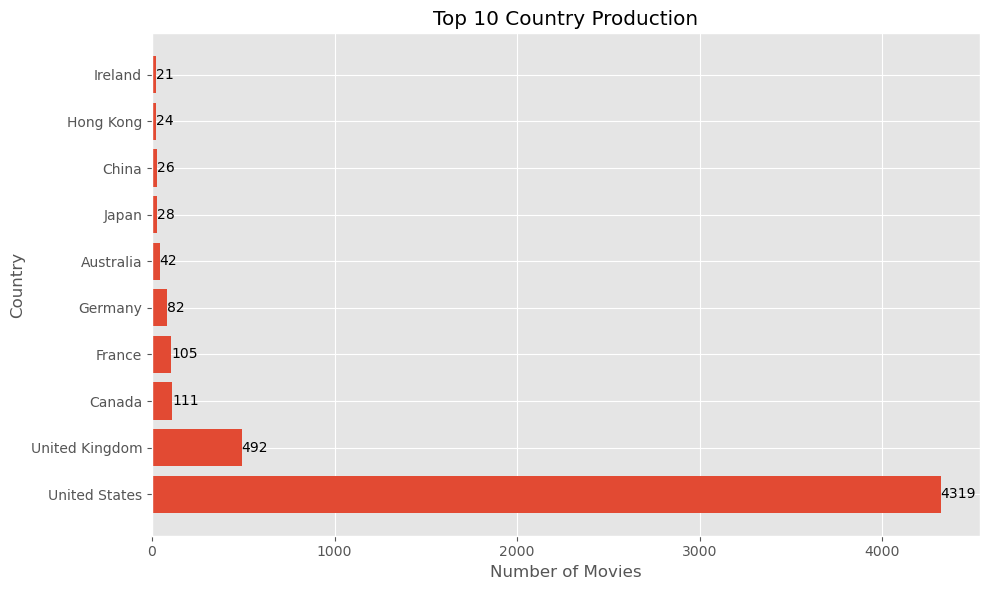

In [71]:
#Analysis of number of movies released in top 10 countries
country = df["country"].value_counts().sort_values(ascending=False).head(10)
country.head()

x = country.values
y = country.index
plt.figure(figsize=(10, 6))
#Plot Bar chart
bars = plt.barh(y, x)
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Country Production')

plt.bar_label(bars)
plt.tight_layout()
plt.show()

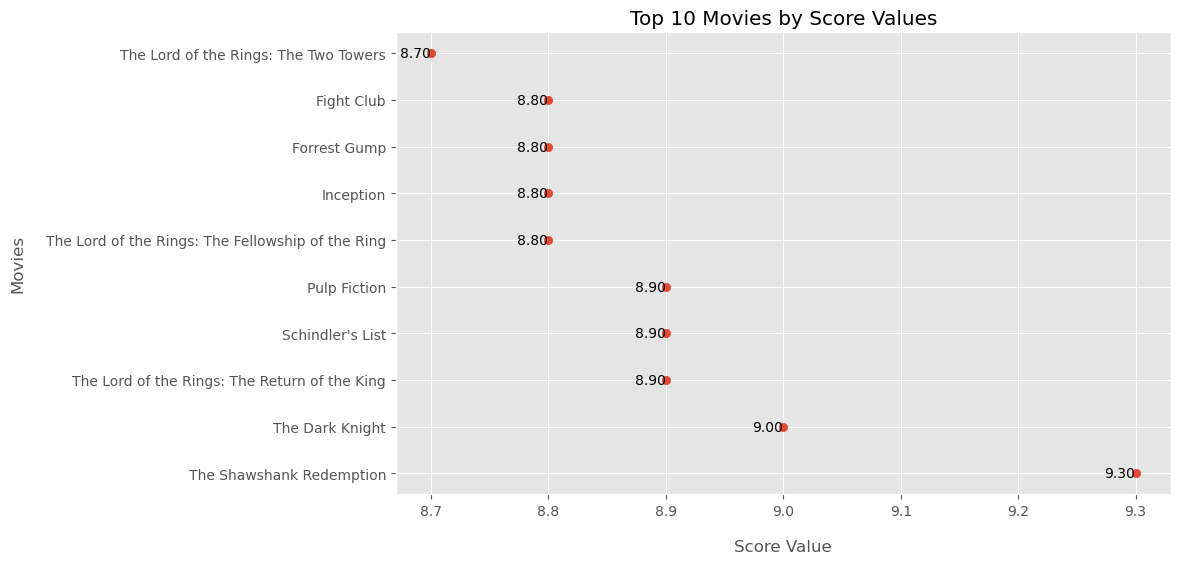

In [74]:
#Analyzing top 10 movies by score value
movie_score = df["score"].nlargest(10)
top_10 = df.loc[movie_score.index, ["name", "score"]].reset_index(drop=True)
top_10

y = top_10["name"]
x = top_10["score"]

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x, y)

plt.xlabel('Score Value', labelpad=15) 
plt.ylabel('Movies', labelpad=15)  
plt.title('Top 10 Movies by Score Values')

# Adding labels 
for i in range(len(x)):
    plt.text(x[i], y[i], f'{x[i]:.2f}', va='center', ha='right', fontsize=10)

plt.show()

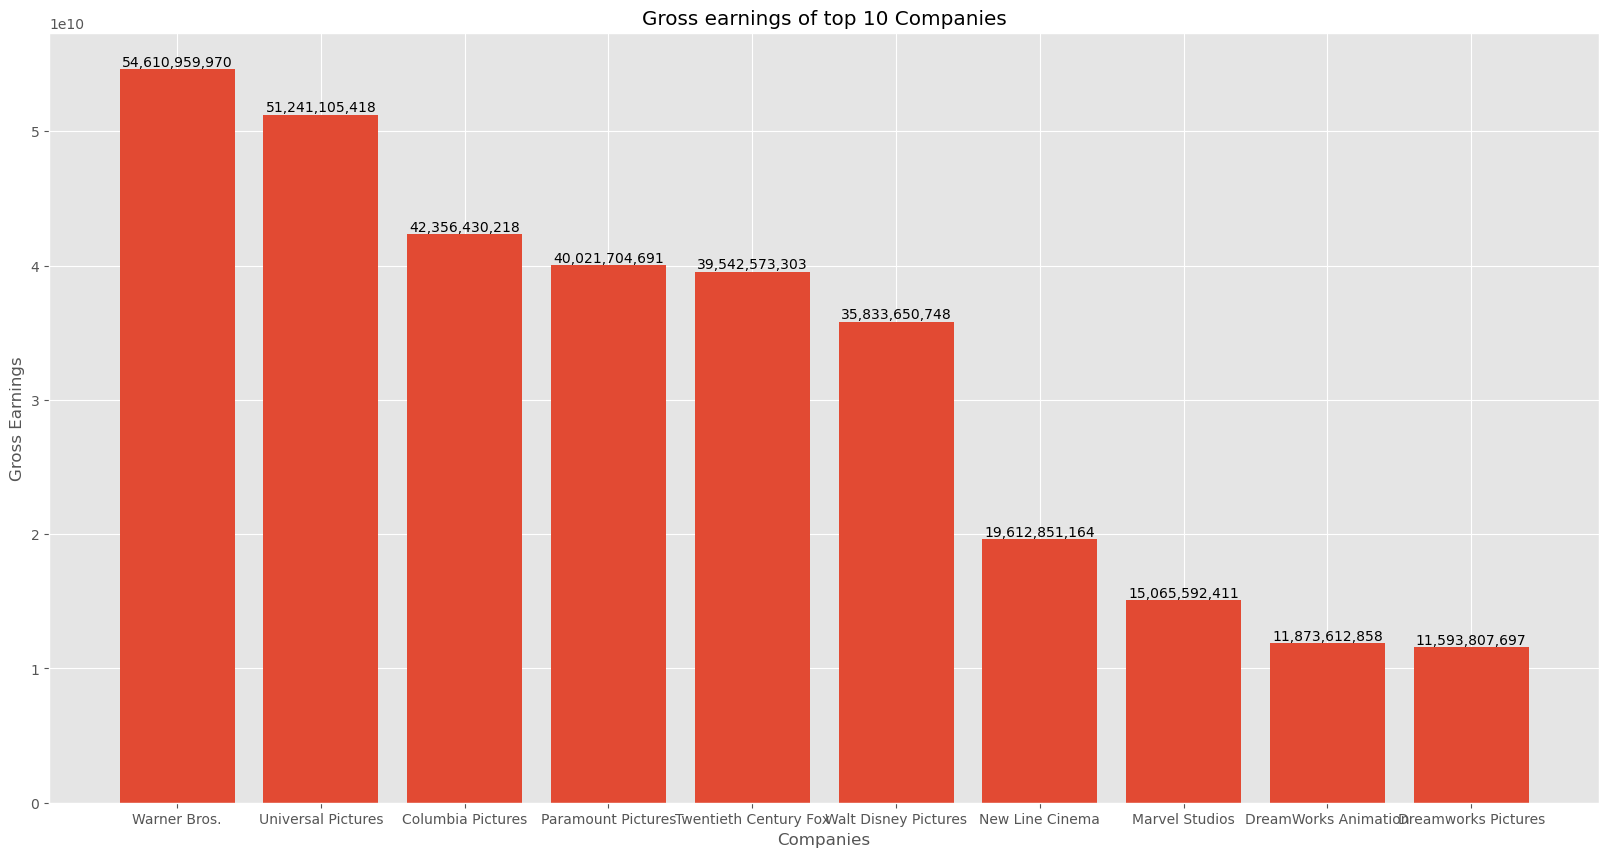

In [80]:
#Gross earnings for top 10 companies
Gross_earnings = df.groupby(['company'])[["gross"]].sum()

Gross_earnings_new = Gross_earnings.sort_values(['gross','company'], ascending = False)[:10]
Gross_earnings_new = Gross_earnings_new['gross'].astype('int64') 
Gross_earnings_new

x = Gross_earnings_new.index
y = Gross_earnings_new.values
plt.figure(figsize=(20, 10))

# Create bar plot
bars = plt.bar(x, y)
plt.xlabel('Companies')
plt.ylabel('Gross Earnings')
plt.title('Gross earnings of top 10 Companies')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', ha='center', va='bottom')

In [87]:
#Find out the average gross earnings of each company
average_gross = df.groupby("company")["gross"].mean().sort_values(ascending=False) 
avg_gross = pd.DataFrame(average_gross)
avg_gross["gross"] = avg_gross["gross"].astype(int)
avg_gross.head(10)

,gross
company,
Marvel Studios,1255466034
Illumination Entertainment,1097122396
Fairview Entertainment,966554929
B24,880681519
Avi Arad Productions,856085151
Chris Morgan Productions,759056935
Jolie Pas,758411779
Lucasfilm,718535219
Marvel Entertainment,714421503


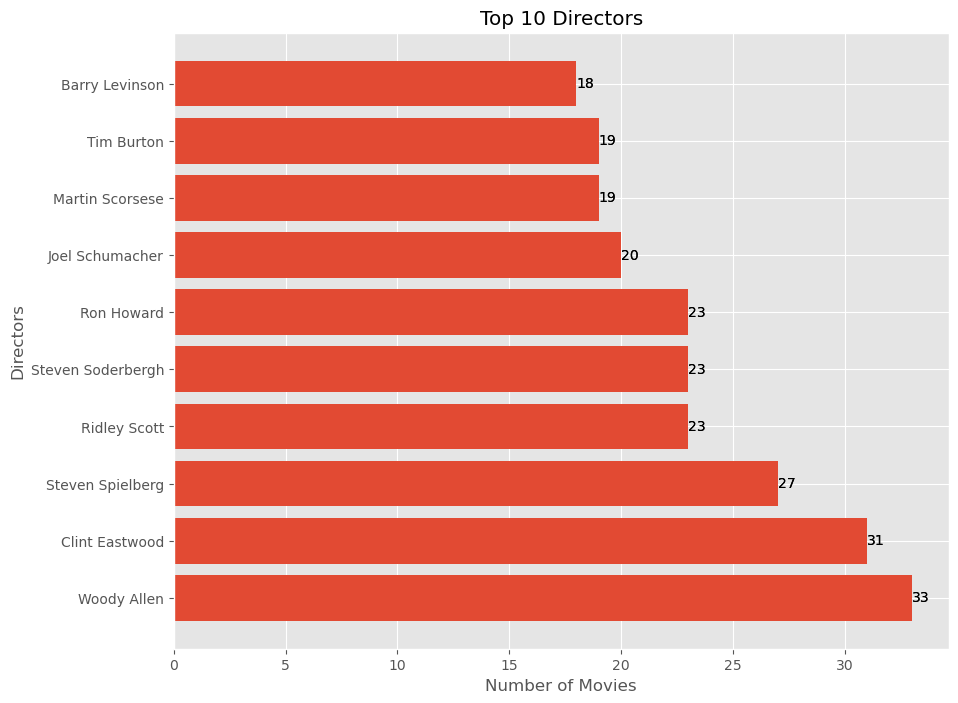

In [88]:
#Who are the top 10 Directors?
top_director = df["director"].value_counts().sort_values(ascending=False).head(10)
top_director.head()

y = top_director.index
x = top_director.values

# Create figure and set size
plt.figure(figsize=(10, 8))

# Plot Bar chart
bars = plt.barh(y, x)
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.title('Top 10 Directors')
plt.bar_label(bars)
plt.bar_label(bars)
plt.show()

In [89]:
#what is the average gross earning of each director?
directors_average_gross = df.groupby('director')['gross'].mean().sort_values(ascending=False)
directors_avg_gross = pd.DataFrame(directors_average_gross)
directors_avg_gross["gross"] = directors_avg_gross["gross"].astype(int)
directors_avg_gross.head(10)

,gross
director,
Anthony Russo,1368849796
Kyle Balda,1097122396
Josh Cooley,1073394593
Chris Buck,1059908950
Joss Whedon,987356728
Lee Unkrich,937394349
James Cameron,892584082
George Lucas,849751079
David Yates,840758069


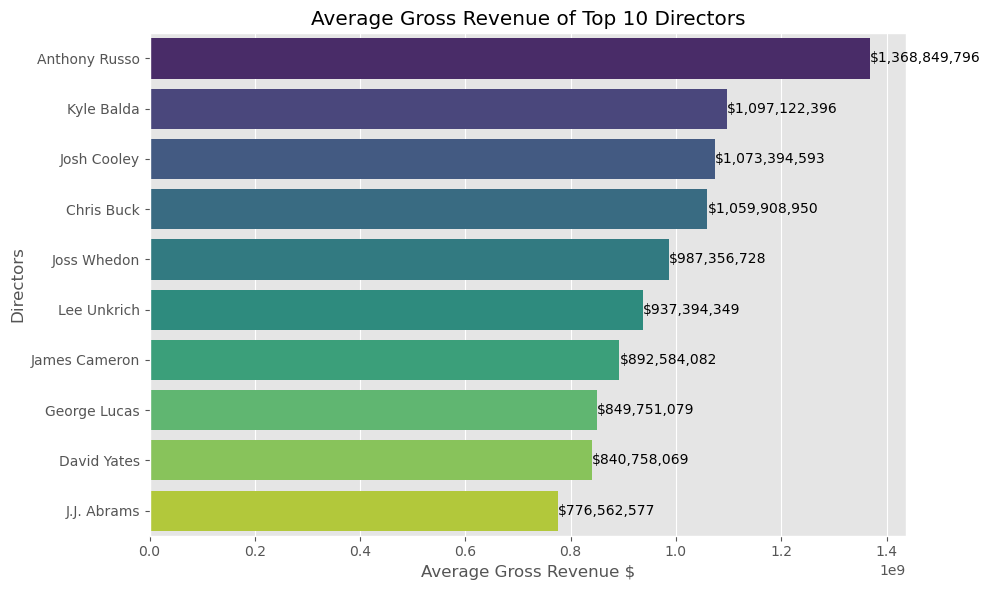

In [107]:
#Graphical representation of average gross eranings of top 10 directors
directors_average_gross_10 = df.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=directors_average_gross_10.values, y=directors_average_gross_10.index, palette='viridis')

for i, value in enumerate(directors_average_gross_10.values):
    plt.text(value, i, f'${int(value):,}', va='center') 

plt.title('Average Gross Revenue of Top 10 Directors')
plt.xlabel('Average Gross Revenue $')
plt.ylabel('Directors')
plt.tight_layout()
plt.show()

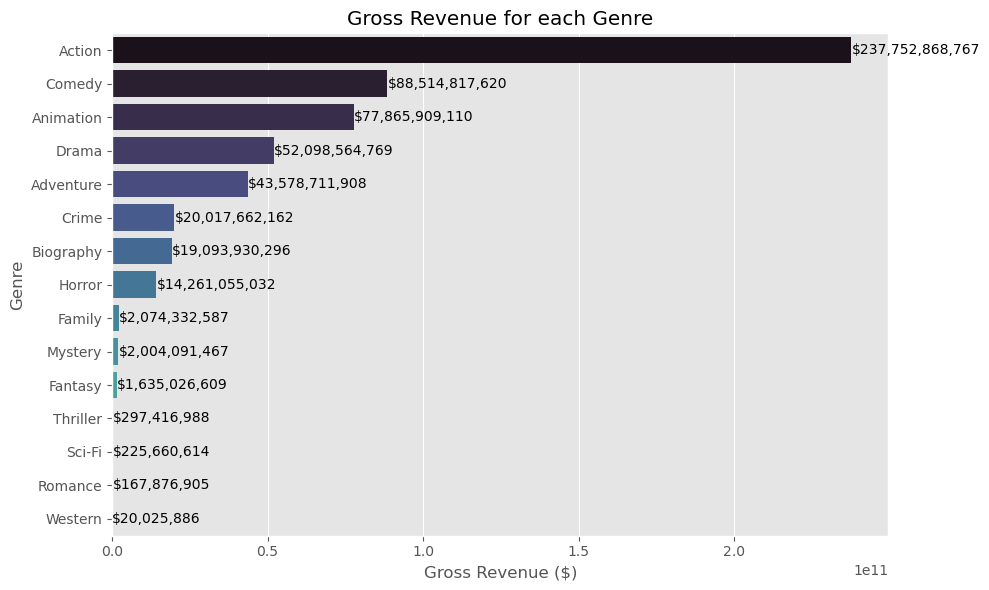

In [110]:
# Which genres have the highest and lowest revenue?
Genre = df.groupby('genre')['gross'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
# Create bar plot
sns.barplot(x=Genre.values, y=Genre.index, palette='mako')

for i, value in enumerate(Genre.values):
    plt.text(value, i, f'${int(value):,}', va='center')  

plt.title('Gross Revenue for each Genre')
plt.xlabel('Gross Revenue ($)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Correlation Analysis


In [113]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime,year_from_release,Corrected_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294,0.075294
year_from_release,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000,1.000000
Corrected_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000,1.000000


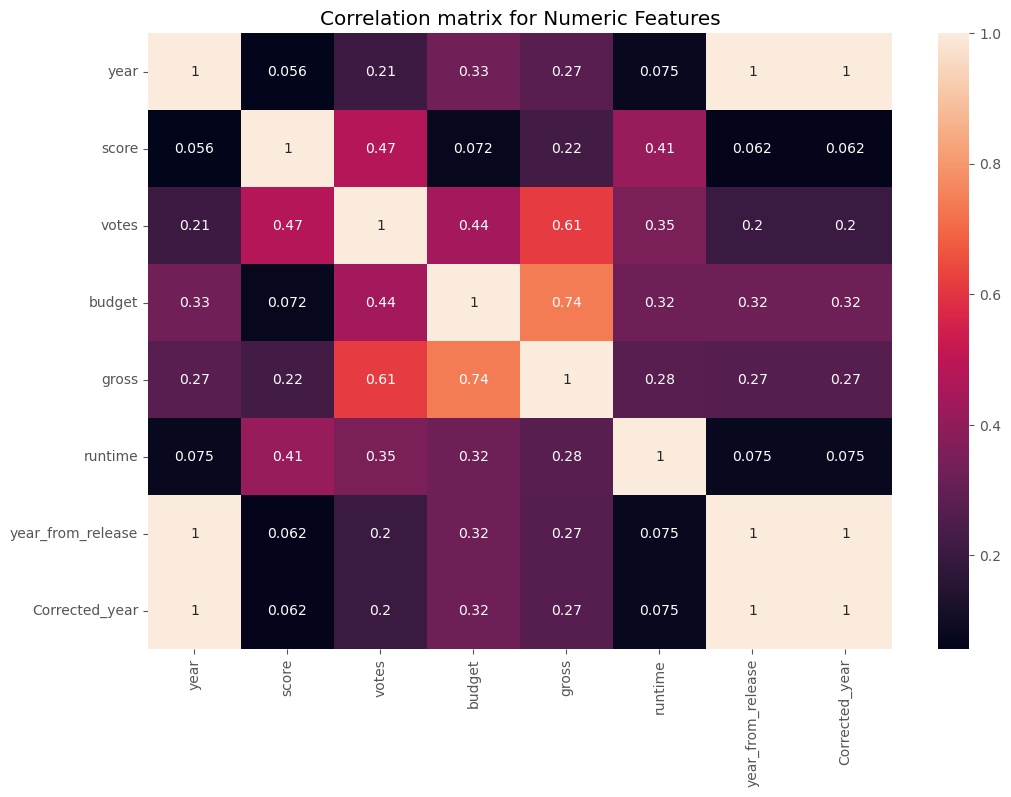

In [114]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.show()

In [115]:
#To add non-numerical column to heat map, we should numerize it.
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_from_release,Corrected_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018,2018


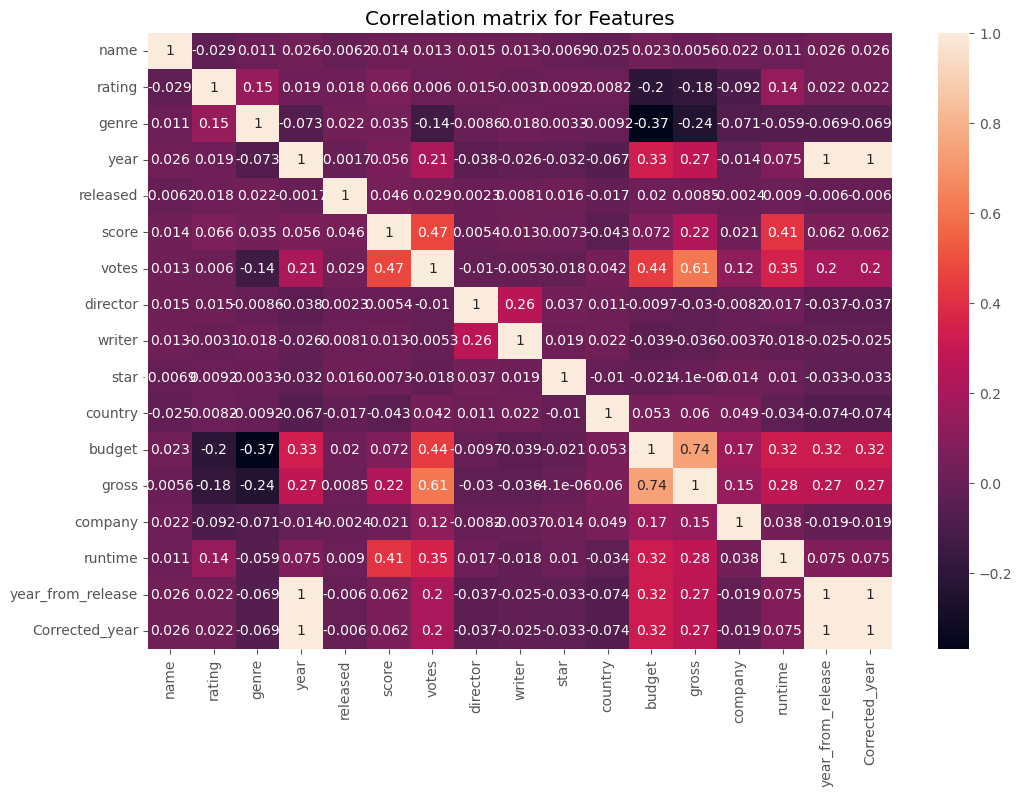

In [116]:
#Visualization of correlation 
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Features")

plt.show()

In [118]:
#Creating correlation pairs to evaluate correlation values for each pair
corr_summary = df_numerized.corr().unstack()
corr_data = corr_summary.sort_values(kind="quicksort")

corr_data

In [119]:
# Retriving pairs with correlation > 0.5
High_corr = corr_data[(corr_data) > 0.5]
High_corr

votes              gross                0.614751
gross              votes                0.614751
budget             gross                0.740247
gross              budget               0.740247
year               year_from_release    0.998726
                   Corrected_year       0.998726
Corrected_year     year                 0.998726
year_from_release  year                 0.998726
name               name                 1.000000
writer             writer               1.000000
year_from_release  year_from_release    1.000000
rating             rating               1.000000
genre              genre                1.000000
year               year                 1.000000
released           released             1.000000
score              score                1.000000
votes              votes                1.000000
year_from_release  Corrected_year       1.000000
director           director             1.000000
star               star                 1.000000
country            c

We can observe the following correlations:

1. Budget has a strong correlation of 0.74 with gross revenue.

2. Votes is positevely correlated with Gross revenue with a correlation of 0.61.

3. Other categorical features show weaker correlations.

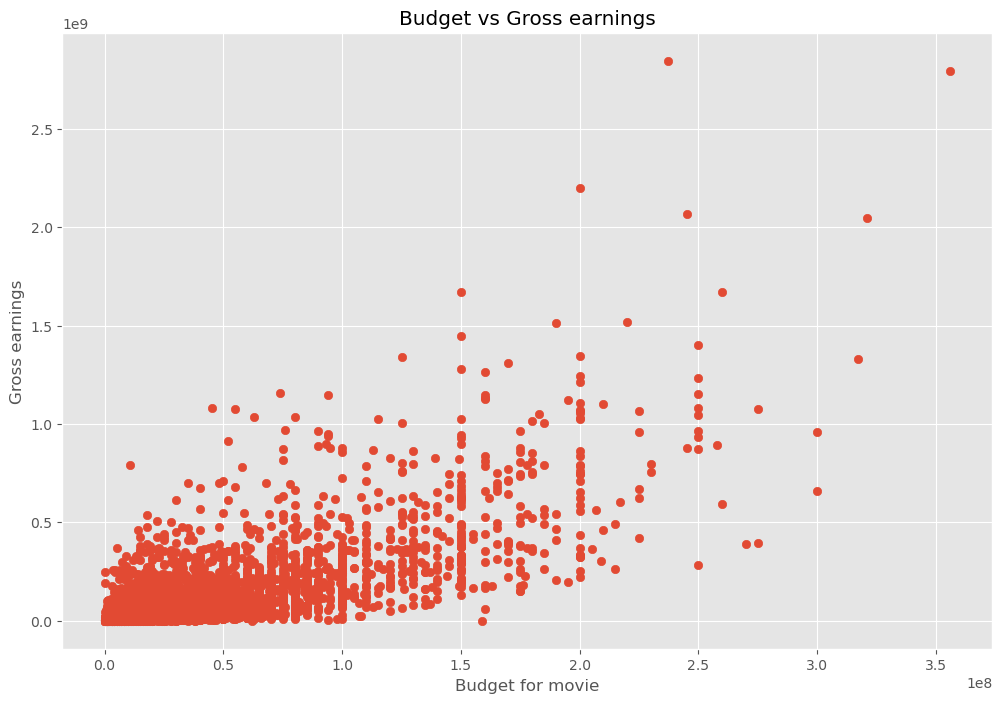

In [46]:
#Scatter plot between Budget for movies and gross earnings
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget for movie')
plt.ylabel('Gross earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

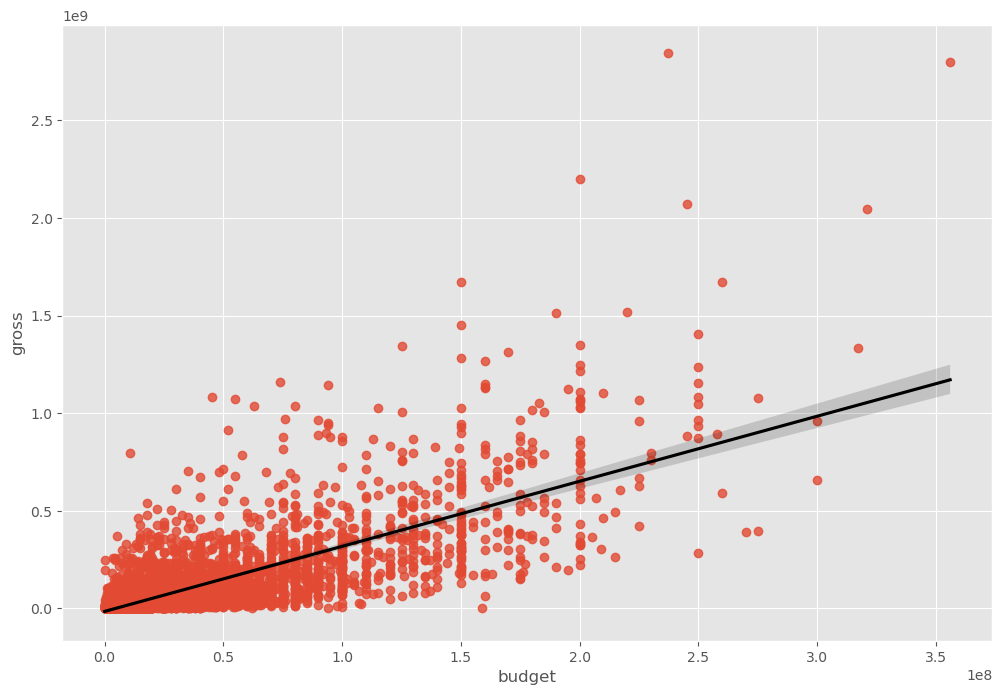

In [124]:
sns.regplot(x='budget', y='gross', data=df, line_kws={"color":"black"})

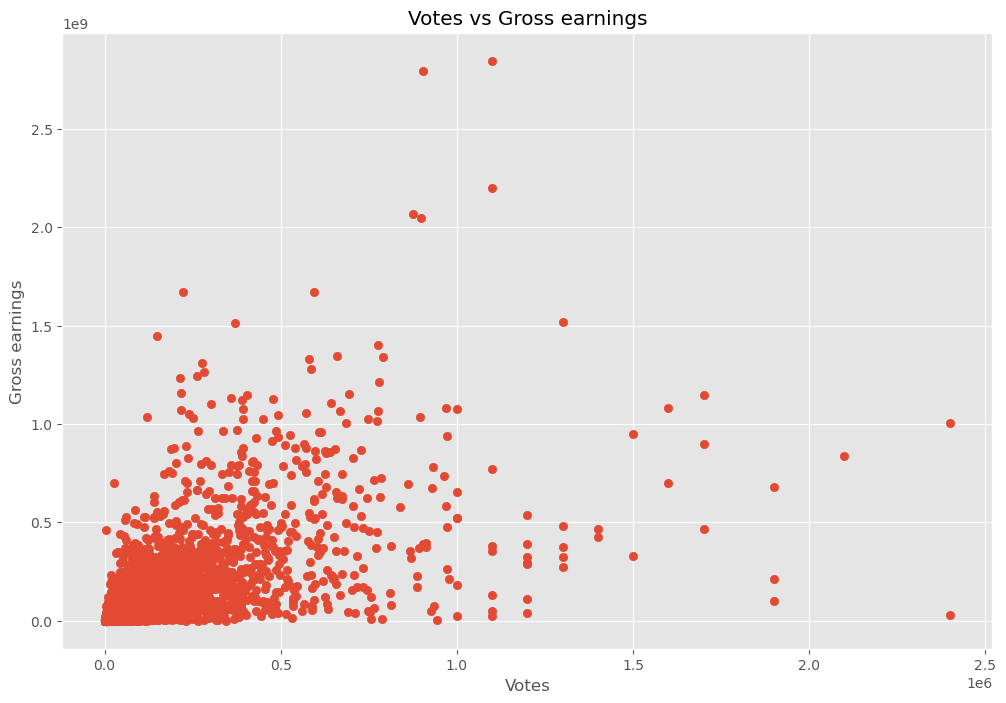

In [121]:
#Scatter plot between Votes and gross earnings
plt.scatter(x=df['votes'], y=df['gross'])
plt.title('Votes vs Gross earnings')
plt.xlabel('Votes')
plt.ylabel('Gross earnings')
plt.show()

<Axes: xlabel='votes', ylabel='gross'>

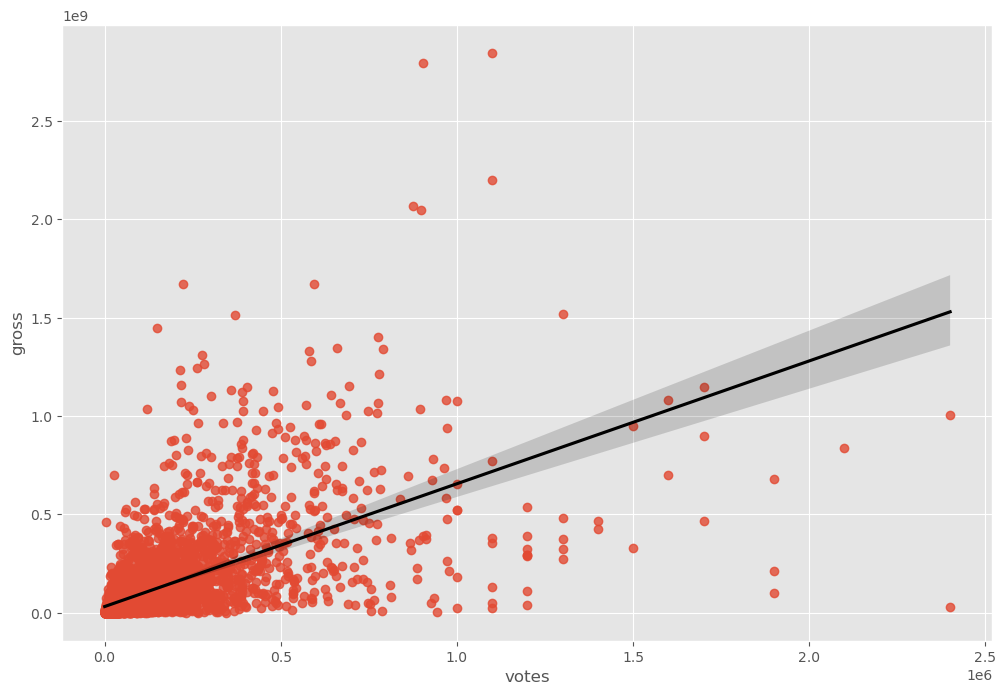

In [125]:
sns.regplot(x='votes', y='gross', data=df, line_kws={"color":"black"})